<a href="https://colab.research.google.com/github/RifkiSstwnn/22_Rifki-Setiawan_PCVK_Sem5_2024/blob/main/Rifki_Setiawan_22_3H_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from PIL import Image as im
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np

def convolve(image, kernel, stride=0, padding=0):
    # Menambahkan padding ke gambar jika diperlukan
    if padding > 0:
        pad_width = ((padding, padding), (padding, padding))
        image = np.pad(image, pad_width, mode='constant')

    # Mendapatkan dimensi gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menentukan ukuran output
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    # Membuat array output (2D untuk grayscale)
    output = np.zeros((output_height, output_width))

    # Melakukan operasi konvolusi
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(
                image[i * stride : i * stride + kernel_height, j * stride : j * stride + kernel_width] * kernel
            )

    # Menjaga nilai output tetap dalam rentang [0, 255]
    output = np.clip(output, 0, 255)

    # Mengembalikan output sebagai tipe uint8
    return output.astype(np.uint8)


In [4]:
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

kernel_leftsobeledgedetection = np.array([[1, 0, -1],
                                          [2, 0, -2],
                                          [1, 0, -1]])

kernel_cannyedgedetection = np.array([[-1, -1, -1],
                                      [-1, 8, -1],
                                      [-1, -1, -1]])

kernel_prewittedgedetection = np.array([[-1, -1, -1],
                                        [0, 0, 0],
                                        [1, 1, 1]])

kernel_gaussian_blur = np.array([[1,  4,  6,  4,  1],
                                 [4, 16, 24, 16,  4],
                                 [7, 26, 36, 26,  7],
                                 [4, 16, 24, 16,  4],
                                 [1,  4,  6,  4,  1]])
kernel_gaussian_blur = kernel_gaussian_blur / 256

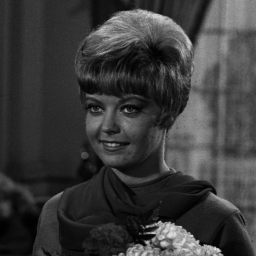

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

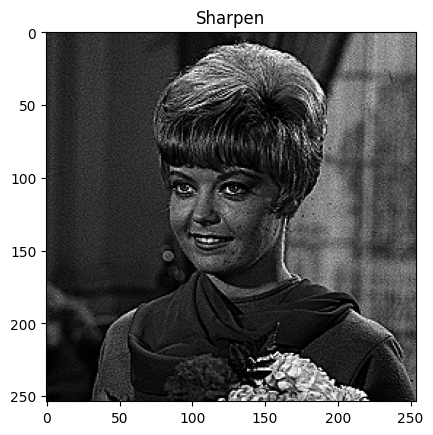

In [6]:
plt.title('Sharpen')
plt.imshow(convolve(img_gray,kernel_sharpen,1), cmap='gray')

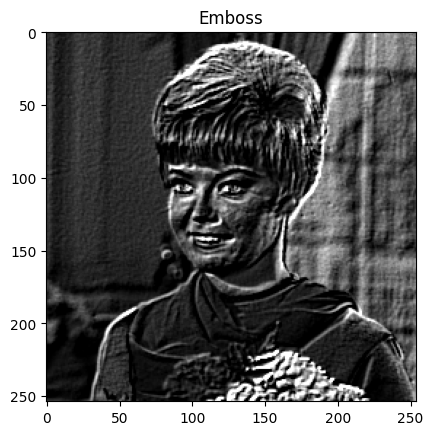

In [7]:
plt.title('Emboss')
plt.imshow(convolve(img_gray,kernel_emboss,1), cmap='gray')

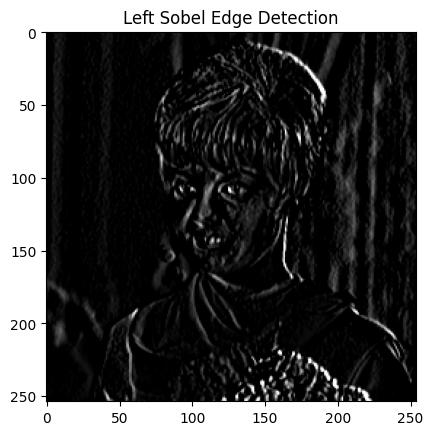

In [8]:
plt.title('Left Sobel Edge Detection')
plt.imshow(convolve(img_gray,kernel_leftsobeledgedetection,1), cmap='gray')

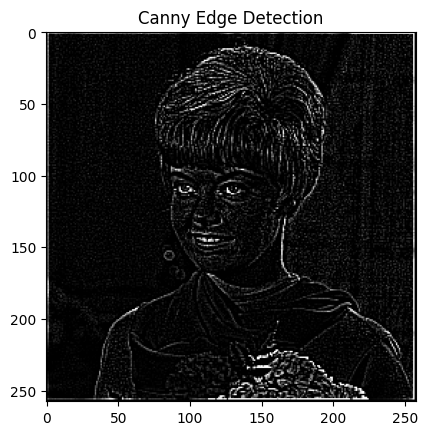

In [9]:
plt.title('Canny Edge Detection')
plt.imshow(convolve(img_gray,kernel_cannyedgedetection,1,2), cmap='gray')

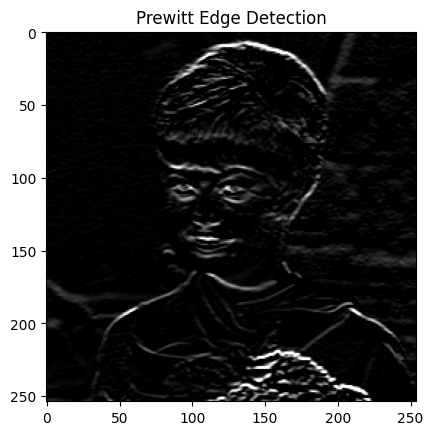

In [10]:
plt.title('Prewitt Edge Detection')
plt.imshow(convolve(img_gray,kernel_prewittedgedetection,1), cmap='gray')

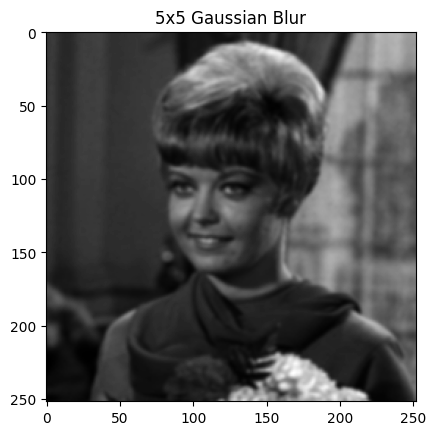

In [11]:
plt.title('5x5 Gaussian Blur')
plt.imshow(convolve(img_gray,kernel_gaussian_blur,1), cmap='gray')

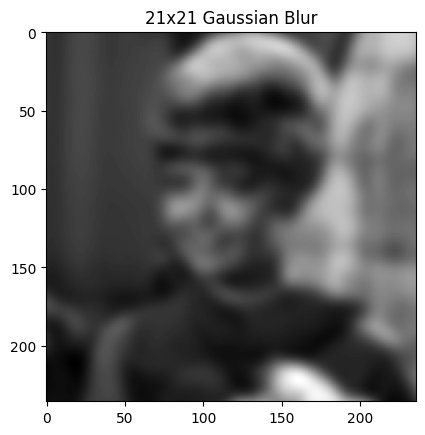

In [12]:
kernel_size=21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

plt.title('21x21 Gaussian Blur')
plt.imshow(convolve(img_gray,gauss_kernel,1), cmap='gray')

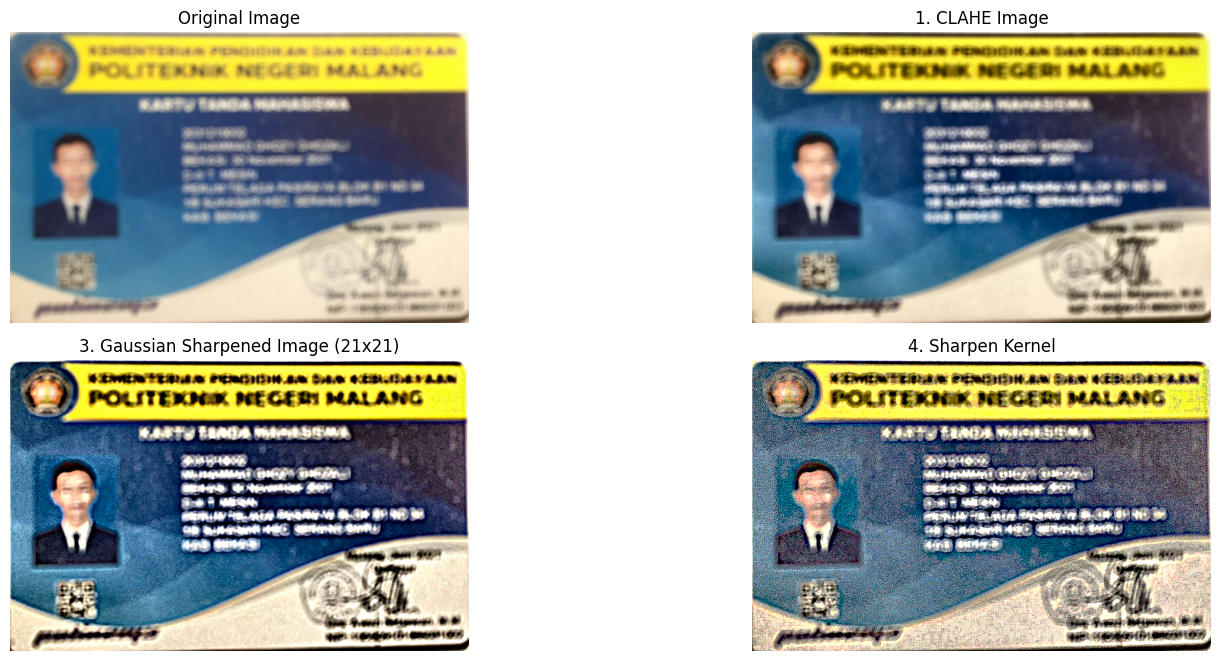

In [20]:
# Fungsi untuk menajamkan gambar menggunakan kernel yang berbeda
def sharpen_image(image, input):
    if input == 1:
        kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])
    else:
        kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])
    sharpened_image = cv.filter2D(src=image, ddepth=-1, kernel=kernel)
    return sharpened_image

# Fungsi untuk CLAHE pada gambar untuk meningkatkan kontras
def clahe_image(image, clipLimit=3, tileGridSize=(6, 6)):
    lab = cv.cvtColor(image, cv.COLOR_RGB2LAB)
    l, a, b = cv.split(lab)

    clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    cl = clahe.apply(l)

    limg = cv.merge((cl, a, b))
    enhanced_image = cv.cvtColor(limg, cv.COLOR_LAB2RGB)
    return enhanced_image

# Fungsi untuk Gaussian Sharpening menggunakan kernel manual
def gaussian_sharpen(image, kernel_size=21, sigma=5, alpha=1.0):

    # Membuat kernel Gaussian
    kernel = gaussian_kernel(kernel_size, sigma)

    # Melakukan konvolusi untuk setiap channel
    blurred = np.zeros_like(image)
    for c in range(3):  # RGB channels
        blurred[:,:,c] = cv.filter2D(image[:,:,c], -1, kernel)

    # Unsharp Masking
    sharpened = cv.addWeighted(image, 1 + alpha, blurred, -alpha, 0)

    # Menggunakan np.clip untuk memastikan nilai output berada dalam rentang [0, 255]
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened

def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Changed figure size and subplot layout to accommodate 5 subplots
plt.figure(figsize=(15, 10))

KTM = cv.imread('/content/drive/MyDrive/PCVK/Images/3C_2041720257_4 - Lian Mega Pertiwi.jpg' )
KTM = cv.cvtColor(KTM, cv.COLOR_BGR2RGB)
plt.subplot(3, 2, 1)
plt.imshow(KTM)
plt.title('Original Image')
plt.axis('off')

KTM_clahe = clahe_image(KTM, clipLimit=2, tileGridSize=(8, 8))
plt.subplot(3, 2, 2)
plt.imshow(KTM_clahe)
plt.title('1. CLAHE Image')
plt.axis('off')


KTM_gaussian_sharpen = gaussian_sharpen(KTM_clahe, kernel_size=40
                                        , sigma=7, alpha=3)
plt.subplot(3, 2, 3)
plt.imshow(KTM_gaussian_sharpen)
plt.title('3. Gaussian Sharpened Image (21x21)')
plt.axis('off')

KTM_sharpen = KTM_gaussian_sharpen
for i in range(2):
  KTM_sharpen = sharpen_image(KTM_sharpen, 2)

plt.subplot(3, 2, 4)
plt.imshow(KTM_sharpen)
plt.title('4. Sharpen Kernel')
plt.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()